SARIMA

train on 4 test on 5th

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results wi


Validation MSE: 467.01
Validation RMSE: 21.61
Predictions saved to 'sarima_cycle5_predictions.csv'


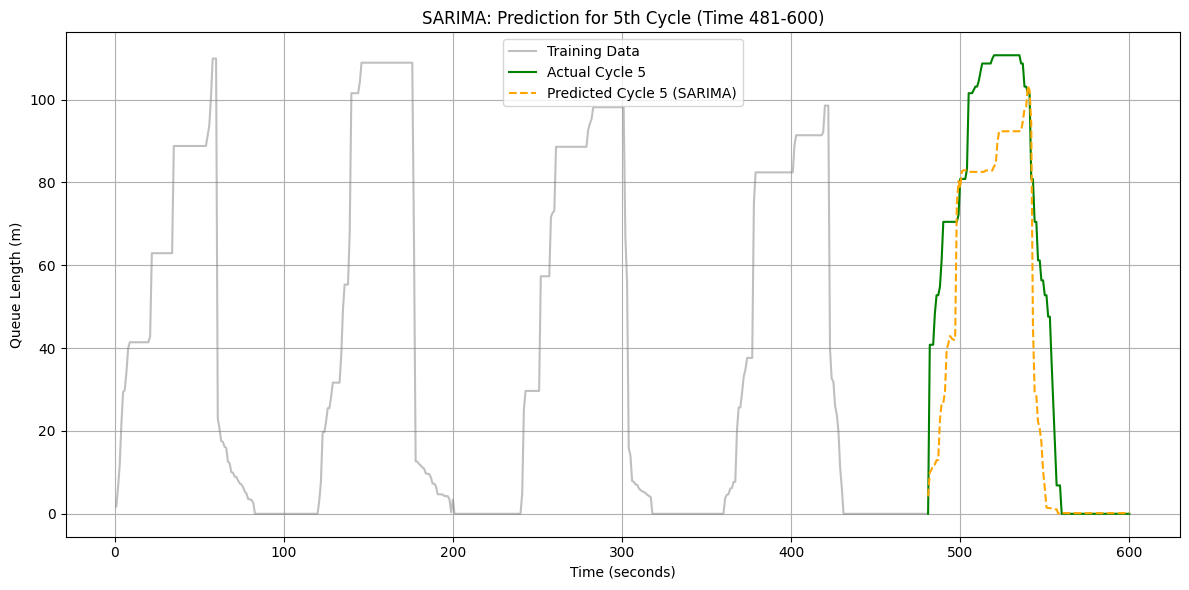

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
import numpy as np

# === Load your Excel data ===
file_path = "/content/modified12345.xlsx"  # Replace with actual file path
df = pd.read_excel(file_path)

# Ensure correct column names
df.columns = ['time', 'modified_queue_length']

# Set time as index
df.set_index('time', inplace=True)

# === Train-test split ===
train = df.loc[1:480]  # First 4 cycles
test = df.loc[481:600]  # 5th cycle

# === Define and fit SARIMA model ===
# You can tune these parameters later if needed
order = (1, 1, 1)
seasonal_order = (1, 1, 1, 120)  # Assuming 120s seasonality

model = SARIMAX(train['modified_queue_length'],
                order=order,
                seasonal_order=seasonal_order,
                enforce_stationarity=False,
                enforce_invertibility=False)
model_fit = model.fit(disp=False)

# === Forecast for the length of the test set ===
forecast = model_fit.forecast(steps=len(test))

# === Calculate error ===
mse = mean_squared_error(test['modified_queue_length'], forecast)
rmse = np.sqrt(mse)

print(f"\nValidation MSE: {mse:.2f}")
print(f"Validation RMSE: {rmse:.2f}")

# === Save prediction to CSV ===
results_df = pd.DataFrame({
    'time': test.index,
    'actual': test['modified_queue_length'].values,
    'predicted': forecast
})
results_df.to_csv("sarima_cycle5_predictions.csv", index=False)
print("Predictions saved to 'sarima_cycle5_predictions.csv'")

# === Plot actual vs predicted ===
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['modified_queue_length'], label='Training Data', color='gray', alpha=0.5)
plt.plot(test.index, test['modified_queue_length'], label='Actual Cycle 5', color='green')
plt.plot(test.index, forecast, label='Predicted Cycle 5 (SARIMA)', linestyle='--', color='orange')
plt.xlabel('Time (seconds)')
plt.ylabel('Queue Length (m)')
plt.title('SARIMA: Prediction for 5th Cycle (Time 481-600)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index


Validation MSE: 225.39
Validation RMSE: 15.01
Predictions saved to 'sarima_cycle9_10_predictions.csv'


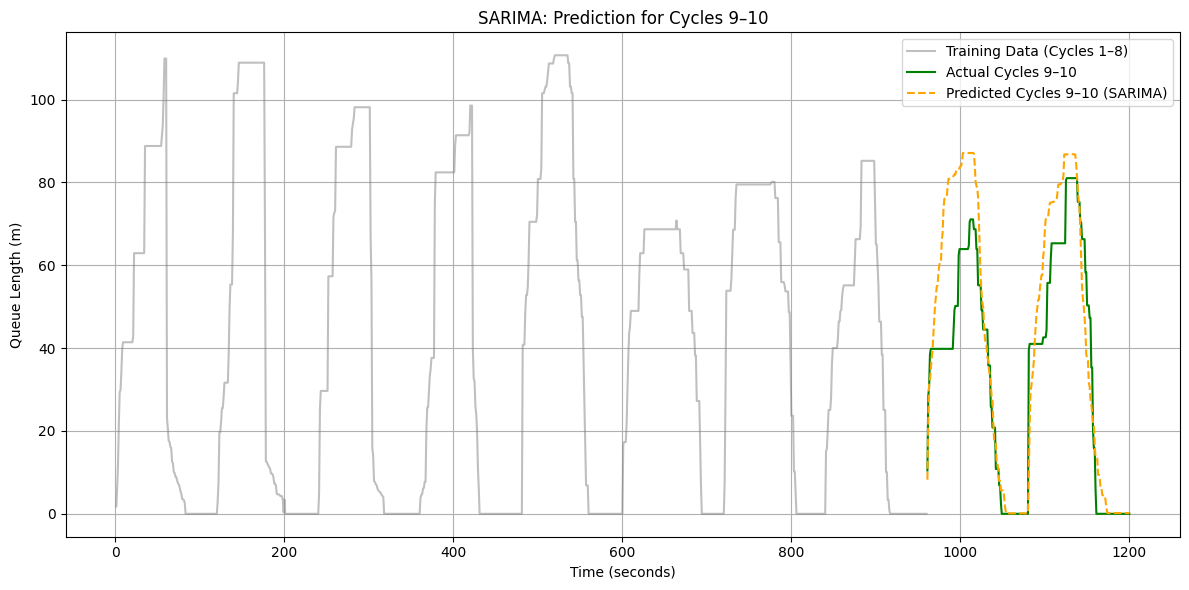

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
import numpy as np

# === Load Excel data ===
file_path = "/content/modified12345678910.xlsx"  # Update path if needed
df = pd.read_excel(file_path)

# Ensure correct column names
df.columns = ['time', 'modified_queue_length']

# Set time as index
df.set_index('time', inplace=True)

# === Train-test split ===
train = df.loc[1:960]   # First 8 cycles (each ~120s)
test = df.loc[961:1200] # Last 2 cycles

# === Define and fit SARIMA model ===
order = (1, 1, 1)
seasonal_order = (1, 1, 1, 120)  # Assuming cycle periodicity is 120s

model = SARIMAX(train['modified_queue_length'],
                order=order,
                seasonal_order=seasonal_order,
                enforce_stationarity=False,
                enforce_invertibility=False)
model_fit = model.fit(disp=False)

# === Forecast for the length of the test set ===
forecast = model_fit.forecast(steps=len(test))

# === Calculate error ===
mse = mean_squared_error(test['modified_queue_length'], forecast)
rmse = np.sqrt(mse)

print(f"\nValidation MSE: {mse:.2f}")
print(f"Validation RMSE: {rmse:.2f}")

# === Save prediction to CSV ===
results_df = pd.DataFrame({
    'time': test.index,
    'actual': test['modified_queue_length'].values,
    'predicted': forecast
})
results_df.to_csv("sarima_cycle9_10_predictions.csv", index=False)
print("Predictions saved to 'sarima_cycle9_10_predictions.csv'")

# === Plot actual vs predicted ===
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['modified_queue_length'], label='Training Data (Cycles 1–8)', color='gray', alpha=0.5)
plt.plot(test.index, test['modified_queue_length'], label='Actual Cycles 9–10', color='green')
plt.plot(test.index, forecast, label='Predicted Cycles 9–10 (SARIMA)', linestyle='--', color='orange')
plt.xlabel('Time (seconds)')
plt.ylabel('Queue Length (m)')
plt.title('SARIMA: Prediction for Cycles 9–10')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


LSTM

##carry past cycles

14 cycles

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.1289 - val_loss: 0.0094
Epoch 2/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0156 - val_loss: 0.0058
Epoch 3/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0113 - val_loss: 0.0049
Epoch 4/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0136 - val_loss: 0.0047
Epoch 5/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0098 - val_loss: 0.0031
Epoch 6/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0070 - val_loss: 0.0028
Epoch 7/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0075 - val_loss: 0.0014
Epoch 8/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0041 - val_loss: 0.0012
Epoch 9/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0045 - val_loss: 0.0014
Epoch 10/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0060 - val_loss: 0.0011
Epoch 11/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0036 - val_loss: 0.0020
Epoch 12/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0066 - 

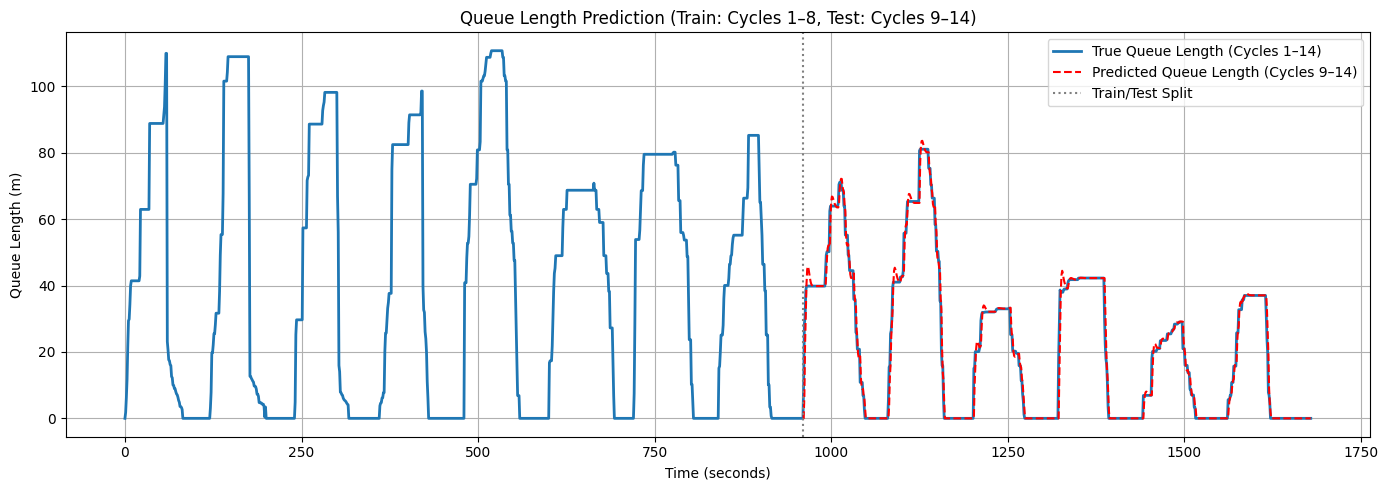

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping

# --- Load and preprocess data ---
df = pd.read_excel('/content/modified1234567891011121314 - Copy.xlsx')  # Make sure your file has 14 cycles
queue_lengths = df['modified_queue_length'].values.reshape(-1, 1)

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(queue_lengths)

# --- Create sequences ---
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

SEQ_LENGTH = 10
X, y = create_sequences(scaled_data, SEQ_LENGTH)

# --- Train/Test split (Cycles 1–8 = train, Cycles 9–14 = test) ---
points_per_cycle = 120  # assuming 1 cycle = 120 points (seconds)
train_cycles = 8
train_len = train_cycles * points_per_cycle  # 960 points

# Prepare training data
X_train, y_train = X[:train_len - SEQ_LENGTH], y[:train_len - SEQ_LENGTH]

# Prepare test input (start from last 10 points of training)
test_input_start = train_len - SEQ_LENGTH
test_input = scaled_data[test_input_start:]



# Define model
model = Sequential([
    LSTM(64, return_sequences=False, input_shape=(SEQ_LENGTH, 1)),
    Dense(32, activation='relu'),
    Dense(1, activation='relu')  # output forced non-negative
])
model.compile(optimizer='adam', loss='mse')


# --- Model ---
#model = Sequential([
#    LSTM(64, return_sequences=False, input_shape=(SEQ_LENGTH, 1)),
#    Dense(32, activation='relu'),
#    Dense(1)
#])
#model.compile(optimizer='adam', loss='mse')

early_stop = EarlyStopping(patience=10, restore_best_weights=True)
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.1, callbacks=[early_stop], verbose=1)

# --- Predict cycles 9–14 ---
X_test_seq, y_test = create_sequences(test_input, SEQ_LENGTH)
y_pred = model.predict(X_test_seq)
#y_pred = np.maximum(y_pred, 0)  # clip negative values

# --- Inverse transform predictions and true values ---
y_pred_real = scaler.inverse_transform(y_pred)
y_test_real = scaler.inverse_transform(y_test)

# --- Calculate RMSE ---
train_rmse = np.sqrt(mean_squared_error(
    scaler.inverse_transform(y_train),
    scaler.inverse_transform(model.predict(X_train))
))
test_rmse = np.sqrt(mean_squared_error(y_test_real, y_pred_real))

print(f"Train RMSE: {train_rmse:.2f} m")
print(f"Test RMSE: {test_rmse:.2f} m")

# --- Plot full true data + predictions for cycles 9–14 ---
full_true_real = scaler.inverse_transform(scaled_data)

plt.figure(figsize=(14, 5))
plt.plot(full_true_real, label='True Queue Length (Cycles 1–14)', linewidth=2)

# Plot predictions for cycles 9–14
start_index = train_len  # where predictions start
plt.plot(range(start_index, start_index + len(y_pred_real)), y_pred_real,
         label='Predicted Queue Length (Cycles 9–14)', linestyle='--', color='red')

plt.axvline(x=start_index, color='gray', linestyle=':', label='Train/Test Split')
plt.title('Queue Length Prediction (Train: Cycles 1–8, Test: Cycles 9–14)')
plt.xlabel('Time (seconds)')
plt.ylabel('Queue Length (m)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
!pip install graphviz
from graphviz import Digraph

def draw_lstm_model():
    dot = Digraph(format='png')
    dot.attr(rankdir='LR', size='8,5')

    # Input Layer
    dot.node('Input', 'Input Sequence\n(10 timesteps, 1 feature)')

    # LSTM Layer
    dot.node('LSTM', 'LSTM Layer\n(64 units)')
    dot.edge('Input', 'LSTM')

    # Dense Layer
    dot.node('Dense1', 'Dense Layer\n(32 neurons, ReLU)')
    dot.edge('LSTM', 'Dense1')

    # Output Layer
    dot.node('Output', 'Output Layer\n(1 value, ReLU)\n= Queue Length')
    dot.edge('Dense1', 'Output')

    return dot

# Show the diagram
draw_lstm_model().render('lstm_model_diagram', view=True)
def draw_lstm_model():
    dot = Digraph(format='png')
    dot.attr(rankdir='LR', size='8,5')

    # Input Layer
    dot.node('Input', 'Input Sequence\n(10 timesteps, 1 feature)')

    # LSTM Layer
    dot.node('LSTM', 'LSTM Layer\n(64 units)')
    dot.edge('Input', 'LSTM')

    # Dense Layer
    dot.node('Dense1', 'Dense Layer\n(32 neurons, ReLU)')
    dot.edge('LSTM', 'Dense1')

    # Output Layer
    dot.node('Output', 'Output Layer\n(1 value, ReLU)\n= Queue Length')
    dot.edge('Dense1', 'Output')

    return dot

# Show the diagram
draw_lstm_model().render('lstm_model_diagram', view=True)


'lstm_model_diagram.png'

RMSE

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping

# --- Load and preprocess data ---
df = pd.read_excel('/content/modified1234567891011121314 - Copy.xlsx')
queue_lengths = df['modified_queue_length'].values.reshape(-1, 1)

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(queue_lengths)

# --- Create sequences ---
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

SEQ_LENGTH = 10
X, y = create_sequences(scaled_data, SEQ_LENGTH)

# --- Define train/test split ---
points_per_cycle = 120  # 1 cycle = 120 points
train_cycles = 8
train_len = train_cycles * points_per_cycle  # 960 points

# Train data
X_train, y_train = X[:train_len - SEQ_LENGTH], y[:train_len - SEQ_LENGTH]

# Test data
test_input_start = train_len - SEQ_LENGTH
test_input = scaled_data[test_input_start:]
X_test_seq, y_test = create_sequences(test_input, SEQ_LENGTH)

# --- Define model ---
model = Sequential([
    LSTM(64, return_sequences=False, input_shape=(SEQ_LENGTH, 1)),
    Dense(32, activation='relu'),
    Dense(1, activation='relu')  # force output to be non-negative
])
model.compile(optimizer='adam', loss='mse')

early_stop = EarlyStopping(patience=10, restore_best_weights=True)
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.1, callbacks=[early_stop], verbose=1)

# --- Predictions ---
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test_seq)

# --- Inverse transform predictions and true values ---
y_train_pred_real = scaler.inverse_transform(y_train_pred)
y_train_real = scaler.inverse_transform(y_train)

y_test_pred_real = scaler.inverse_transform(y_test_pred)
y_test_real = scaler.inverse_transform(y_test)

# --- Calculate RMSE per cycle ---
train_cycle_rmses = []
for i in range(train_cycles):
    start_idx = i * points_per_cycle
    end_idx = (i+1) * points_per_cycle
    y_true_cycle = y_train_real[start_idx:end_idx - SEQ_LENGTH]
    y_pred_cycle = y_train_pred_real[start_idx:end_idx - SEQ_LENGTH]
    rmse_cycle = np.sqrt(mean_squared_error(y_true_cycle, y_pred_cycle))
    train_cycle_rmses.append(rmse_cycle)

test_cycle_rmses = []
for i in range(6):  # cycles 9 to 14
    start_idx = i * points_per_cycle
    end_idx = (i+1) * points_per_cycle
    y_true_cycle = y_test_real[start_idx:end_idx - SEQ_LENGTH]
    y_pred_cycle = y_test_pred_real[start_idx:end_idx - SEQ_LENGTH]
    rmse_cycle = np.sqrt(mean_squared_error(y_true_cycle, y_pred_cycle))
    test_cycle_rmses.append(rmse_cycle)

# --- Print RMSEs ---
print("\nTrain Cycles (1-8) RMSEs:")
for idx, rmse in enumerate(train_cycle_rmses, 1):
    print(f"Cycle {idx}: {rmse:.2f} m")

print("\nTest Cycles (9-14) RMSEs:")
for idx, rmse in enumerate(test_cycle_rmses, 9):
    print(f"Cycle {idx}: {rmse:.2f} m")


Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - loss: 0.1452 - val_loss: 0.0139
Epoch 2/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0198 - val_loss: 0.0071
Epoch 3/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0137 - val_loss: 0.0056
Epoch 4/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0110 - val_loss: 0.0032
Epoch 5/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0060 - val_loss: 0.0026
Epoch 6/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0062 - val_loss: 0.0014
Epoch 7/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0054 - val_loss: 0.0021
Epoch 8/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0063 - val_loss: 0.0012
Epoch 9/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0049 - val_loss: 0.0013
Epoch 10/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0052 - val_loss: 0.0012
Epoch 11/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0051 - val_loss: 0.0011
Epoch 12/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0048 - val

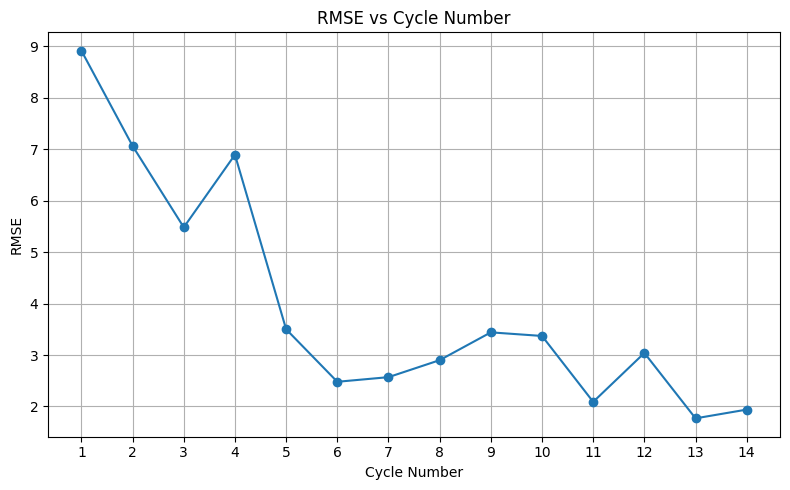

In [ ]:
import matplotlib.pyplot as plt

# Data
cycle_number = list(range(1, 15))  # 1 to 14
rmse = [8.91, 7.06, 5.48, 6.89, 3.5, 2.48, 2.57, 2.90, 3.44, 3.37, 2.09, 3.04, 1.77, 1.94]

# Plot
plt.figure(figsize=(8, 5))
plt.plot(cycle_number, rmse, marker='o', linestyle='-')
plt.xlabel('Cycle Number')
plt.ylabel('RMSE')
plt.title('RMSE vs Cycle Number')
plt.xticks(cycle_number)  # Show all cycle numbers as x-ticks
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np

# RMSE values
rmse = [8.91, 7.06, 5.48, 6.89, 3.5, 2.48, 2.57, 2.90, 3.44, 3.37, 2.09, 3.04, 1.77, 1.94]

# Calculate mean
mean_rmse = np.mean(rmse)

print(f"Mean RMSE: {mean_rmse:.2f}")


Mean RMSE: 3.96


error

cycle 10


📊 LSTM Prediction vs Manual Actual
MAE  = 6.33
RMSE = 8.88
MAPE = 3198917.60%

📊 Excel Values vs Manual Actual
MAE  = 5.82
RMSE = 8.29
MAPE = 487611.39%


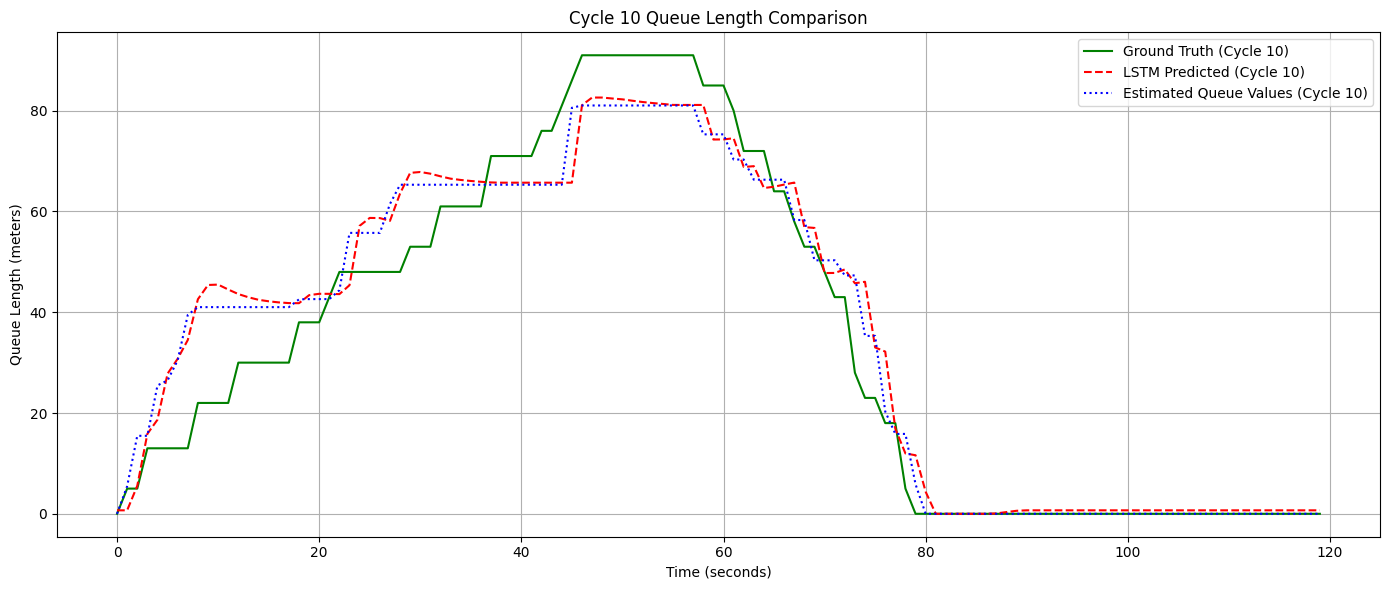

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error

# === Step 1: Manually provided actual values for Cycle 10 ===
manual_actuals = [
    0, 5, 5, 13, 13, 13, 13, 13, 22, 22, 22, 22, 30, 30, 30, 30, 30, 30, 38, 38, 38, 43,
    48, 48, 48, 48, 48, 48, 48, 53, 53, 53, 61, 61, 61, 61, 61, 71, 71, 71, 71, 71, 76,
    76, 81, 86, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 85, 85, 85, 80, 72, 72,
    72, 64, 64, 58, 53, 53, 48, 43, 43, 28, 23, 23, 18, 18, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0,
    0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
    0, 0, 0, 0
]
#manual_actuals = [
#    30, 35, 35, 37, 37, 37, 37, 37, 42, 42, 42, 42, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43,
#    48, 48, 48, 48, 48, 48, 48, 53, 53, 53, 61, 61, 61, 61, 61, 71, 71, 71, 71, 71, 76,
#    76, 81, 86, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 85, 85, 85, 80, 72, 72,
#    72, 64, 64, 58, 53, 53, 48, 43, 43, 28, 23, 23, 18, 18, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0,
#    0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
#    0, 0, 0, 0
#]

manual_actuals = np.array(manual_actuals)


# === Step 2: Load LSTM predictions (must be unscaled) ===
# Replace this with your actual LSTM predictions for cycle 10
predicted_lstm = y_pred_real.flatten()[120:240]  # If already inverse scaled

# === Step 3: Load Excel and extract cycle 10 values (time 1081 to 1200) ===
df = pd.read_excel("/content/modified12345678910 - Copy.xlsx")
df.columns = ['time', 'queue']
excel_actuals = df[(df['time'] >= 1081) & (df['time'] <= 1200)]['queue'].values

# === Step 4: Define metric function ===
def evaluate(true, pred, title):
    mae = mean_absolute_error(true, pred)
    rmse = np.sqrt(mean_squared_error(true, pred))
    mape = np.mean(np.abs((true - pred) / (true + 1e-5))) * 100
    print(f"\n📊 {title}")
    print(f"MAE  = {mae:.2f}")
    print(f"RMSE = {rmse:.2f}")
    print(f"MAPE = {mape:.2f}%")

# === Step 5: Run evaluations ===
evaluate(manual_actuals, predicted_lstm, "LSTM Prediction vs Manual Actual")
evaluate(manual_actuals, excel_actuals, "Excel Values vs Manual Actual")

# === Step 6: Plot all 3 ===
plt.figure(figsize=(14, 6))
plt.plot(manual_actuals, label='Ground Truth (Cycle 10)', color='green')
plt.plot(predicted_lstm, label='LSTM Predicted (Cycle 10)', linestyle='--', color='red')
plt.plot(excel_actuals, label='Estimated Queue Values (Cycle 10)', linestyle='dotted', color='blue')
plt.title("Cycle 10 Queue Length Comparison")
plt.xlabel("Time (seconds)")
plt.ylabel("Queue Length (meters)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


cycle 9


📊 LSTM Prediction vs Manual Actual
MAE  = 6.10
RMSE = 8.66
MAPE = 1410773.42%

📊 Excel Values vs Manual Actual
MAE  = 5.72
RMSE = 8.43
MAPE = 19.17%


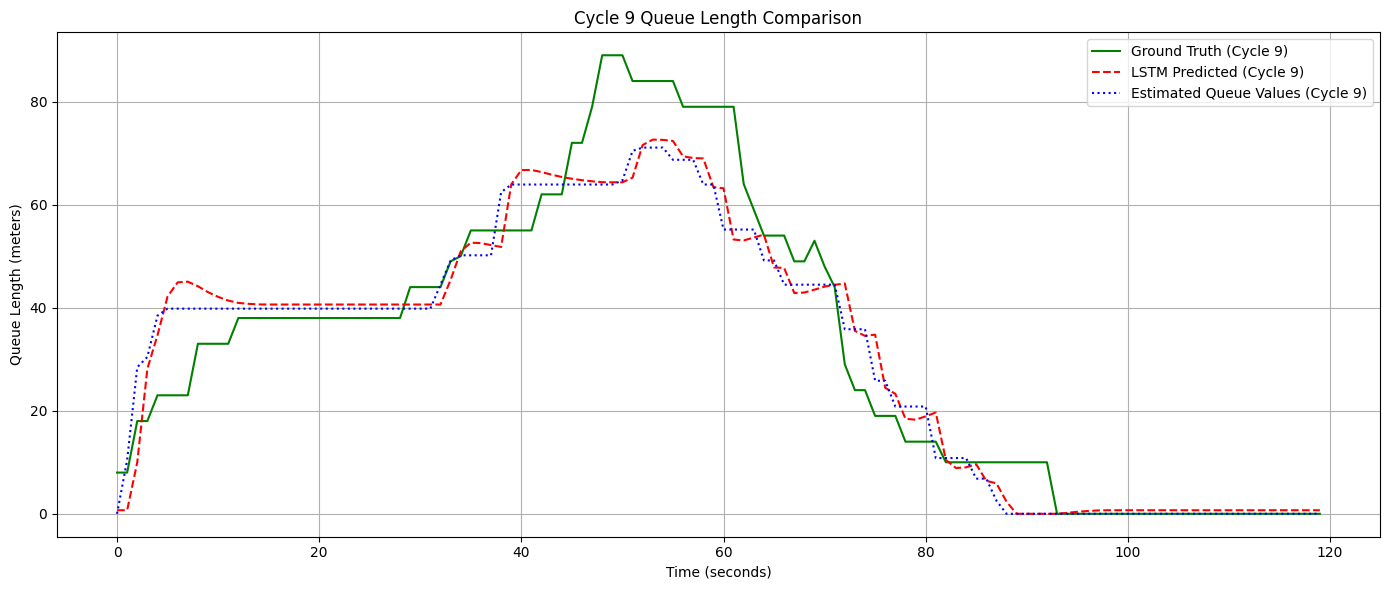

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error

# === Step 1: Manually provided actual values for Cycle 10 ===
manual_actuals = [
    8, 8, 18, 18, 23, 23, 23, 23, 33, 33, 33, 33, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38,
    38, 38, 38, 38, 38, 38, 38, 44, 44, 44, 44, 49, 50, 55, 55, 55, 55, 55, 55, 55, 62,
    62, 62, 72, 72, 79, 89, 89, 89, 84, 84, 84, 84, 84, 79, 79, 79, 79, 79, 79, 64, 59,
    54, 54, 54, 49, 49, 53, 48, 44, 29, 24, 24, 19, 19, 19, 14, 14, 14, 14, 10, 10, 10, 10, 10, 10,
    10, 10, 10, 10, 10, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
    0, 0, 0, 0
]

manual_actuals = np.array(manual_actuals)


# === Step 2: Load LSTM predictions (must be unscaled) ===
# Replace this with your actual LSTM predictions for cycle 10
predicted_lstm = y_pred_real.flatten()[:120]  # If already inverse scaled
#cycle9_pred = y_pred.flatten()[:120]

# === Step 3: Load Excel and extract cycle 10 values (time 1081 to 1200) ===
df = pd.read_excel("/content/modified12345678910 - Copy.xlsx")
df.columns = ['time', 'queue']
excel_actuals = df[(df['time'] >= 961) & (df['time'] <= 1080)]['queue'].values

# === Step 4: Define metric function ===
def evaluate(true, pred, title):
    mae = mean_absolute_error(true, pred)
    rmse = np.sqrt(mean_squared_error(true, pred))
    mape = np.mean(np.abs((true - pred) / (true + 1e-5))) * 100
    print(f"\n📊 {title}")
    print(f"MAE  = {mae:.2f}")
    print(f"RMSE = {rmse:.2f}")
    print(f"MAPE = {mape:.2f}%")

# === Step 5: Run evaluations ===
evaluate(manual_actuals, predicted_lstm, "LSTM Prediction vs Manual Actual")
evaluate(manual_actuals, excel_actuals, "Excel Values vs Manual Actual")

# === Step 6: Plot all 3 ===
plt.figure(figsize=(14, 6))
plt.plot(manual_actuals, label='Ground Truth (Cycle 9)', color='green')
plt.plot(predicted_lstm, label='LSTM Predicted (Cycle 9)', linestyle='--', color='red')
plt.plot(excel_actuals, label='Estimated Queue Values (Cycle 9)', linestyle='dotted', color='blue')
plt.title("Cycle 9 Queue Length Comparison")
plt.xlabel("Time (seconds)")
plt.ylabel("Queue Length (meters)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()